<a href="https://colab.research.google.com/github/sanchariguhaniyogi/lead_Classification/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [ ]:
df = pd.read_csv('lead_conv.csv', na_values='?')
#df.head()
df.columns


Index(['Opportunity No.', 'Outcome', 'Product', 'Industry', 'Region',
       'Relative Strength in the segment', 'Profit of Customer in Million',
       'Sales Value in Million', 'Profit %', 'WSES Proportion in Joint Bid',
       'Leads Conversion Class'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Outcome': 'target'})
df['target'].value_counts(dropna=False)

0    519
1    481
Name: target, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Product', 'Industry', 'Region', 'Leads Conversion Class'], drop_first=True)
df

,Opportunity No.,target,Relative Strength in the segment,Profit of Customer in Million,Sales Value in Million,Profit %,WSES Proportion in Joint Bid,Product_Finsys,Product_GTMSys,Product_LearnSys,...,Region_Canada,Region_India,Region_Japan,Region_Other Europe,Region_Singapore,Region_Spain,Region_UK,Leads Conversion Class_F,Leads Conversion Class_L,Leads Conversion Class_V
0,1,0,45,2.11,10.29,29,66,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2,1,56,0.79,11.42,46,50,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,48,1.62,5.63,70,50,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,4,1,58,0.09,10.17,46,56,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,1,49,1.46,10.60,32,54,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,46,0.71,3.97,42,72,0,0,0,...,0,0,0,0,0,0,1,0,0,0
996,997,0,67,1.43,9.31,33,65,0,1,0,...,0,0,0,0,0,0,1,0,1,0
997,998,0,42,1.75,8.18,58,68,0,0,1,...,0,0,0,0,0,0,1,0,0,0
998,999,1,32,0.30,9.78,56,55,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
numeric_cols = ['Relative Strength in the segment', 'Profit of Customer in Million',
       'Sales Value in Million', 'Profit %', 'WSES Proportion in Joint Bid',]
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'}) #categorical columns
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['Relative Strength in the segment', 'Profit of Customer in Million', 'Sales Value in Million', 'Profit %', 'WSES Proportion in Joint Bid']
['Industry_Airline', 'Industry_Banks', 'Industry_Capital Markets', 'Industry_Clinical research', 'Industry_Consumer goods', 'Industry_Defense', 'Industry_Energy', 'Industry_Finance', 'Industry_Govt.', 'Industry_Health', 'Industry_Infrastructure', 'Industry_Insurance', 'Industry_Mobility', 'Industry_Other Govt.', 'Industry_Others', 'Industry_Security', 'Industry_Telecom equipments', 'Leads Conversion Class_F', 'Leads Conversion Class_L', 'Leads Conversion Class_V', 'Opportunity No.', 'Product_Finsys', 'Product_GTMSys', 'Product_LearnSys', 'Product_Lifesys', 'Product_Logissys', 'Product_Procsys', 'Region_Americas', 'Region_Canada', 'Region_India', 'Region_Japan', 'Region_Other Europe', 'Region_Singapore', 'Region_Spain', 'Region_UK']


In [ ]:
random_seed = 1000
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(800, 41)
(200, 41)

0    0.51875
1    0.48125
Name: target, dtype: float64

0    0.52
1    0.48
Name: target, dtype: float64


In [ ]:
#Scaling the dataset 
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)



In [ ]:
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=22)

In [ ]:
y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.845


In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier( random_state = 22)


In [ ]:
models = []
scores = []
clf.fit(X_train, y_train)
models.append(clf)
scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))



In [ ]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


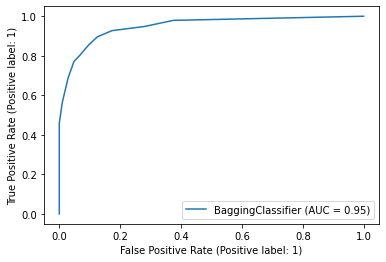

In [ ]:
plot_roc_curve(clf, X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


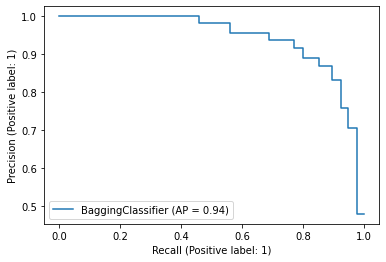

In [ ]:
plot_precision_recall_curve(clf, X_test, y_test)


In [ ]:
test_prob = clf.predict_proba(X_test)[:, 1] # the second column is P(target = 1)
test_pred = clf.predict(X_test)

In [ ]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))




Log loss = 0.58365
AUC = 0.94932
Average Precision = 0.94337

Using 0.5 as threshold:
Accuracy = 0.87000
Precision = 0.91667
Recall = 0.80208
F1 score = 0.85556


Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


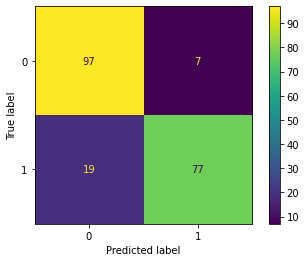

In [ ]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
from sklearn import metrics
recall_sensitivity = metrics.recall_score(y_test, test_pred, pos_label=1)
recall_specificity = metrics.recall_score(y_test, test_pred, pos_label=0)
recall_sensitivity, recall_specificity 

(0.8020833333333334, 0.9326923076923077)